In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("kddcup.data_10_percent.gz")
data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Data Preprocessing

In [2]:
data.shape

(494020, 42)

In [3]:
data.isnull().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11       0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [4]:
with open('kddcup.names') as f:
    col=f.read()
    print(col)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [5]:
cols = []
col=col.split("\n")[1:]
for i in col:
    if len(i) > 1:
        print(i.split(":")[0])
        cols.append(i.split(":")[0])
cols.append("target")

print(cols)

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',

In [6]:
col_names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
data.columns=col_names
print(data.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        239        486     0   
1         0           tcp    http   SF        235       1337     0   
2         0           tcp    http   SF        219       1337     0   
3         0           tcp    http   SF        217       2032     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  19   
1               0       0    0  ...                  29   
2               0       0    0  ...                  39   
3               0       0    0  ...                  49   
4               0       0    0  ...                  59   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [7]:
with open('training_attack_types') as f:
    attack_types=f.read()
    print(attack_types)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [8]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [9]:
data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]])

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
data['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [11]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
data['flag'].unique()


array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [13]:
data['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [14]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

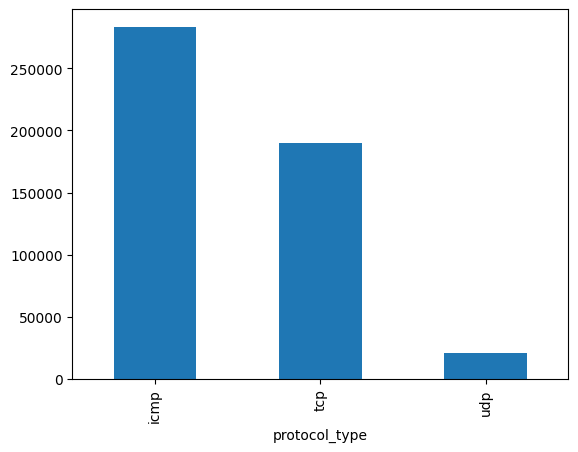

In [15]:
bar_graph('protocol_type')

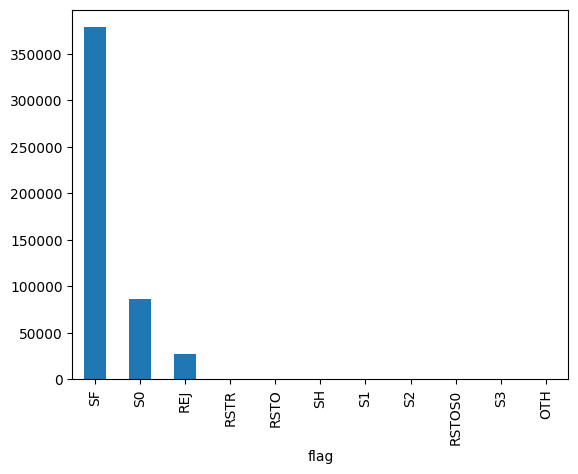

In [16]:
bar_graph('flag')

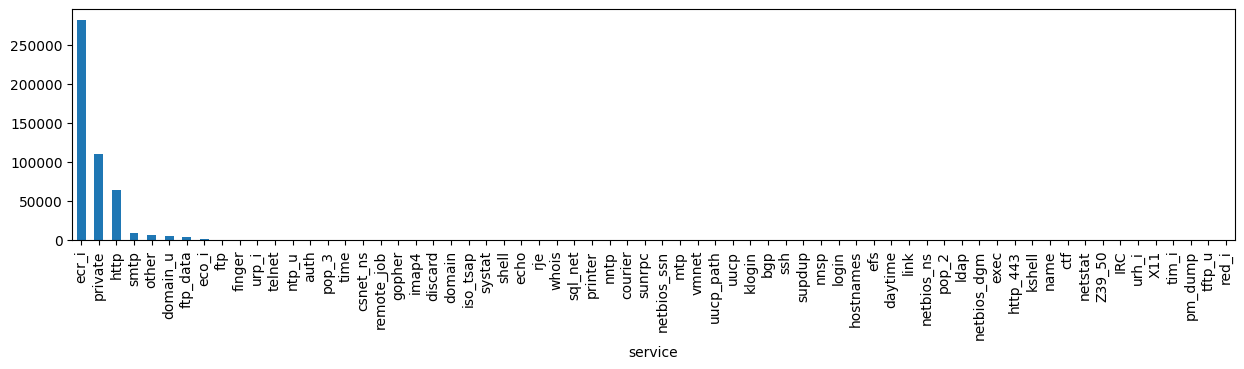

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

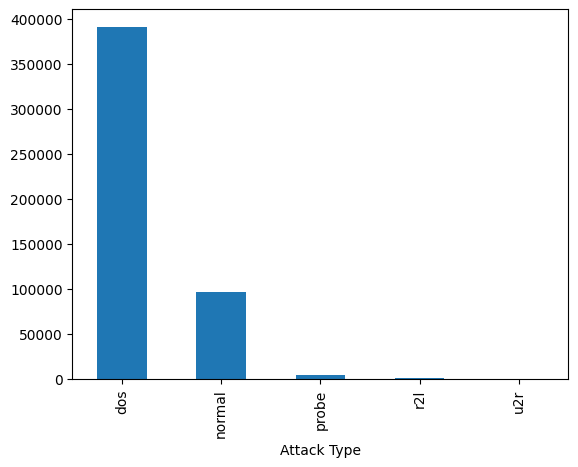

In [18]:
bar_graph("Attack Type")

In [19]:
print(data.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
data['service']=encoder.fit_transform(data['service'])
data['protocol_type']=encoder.fit_transform(data['protocol_type'])
data['flag']=encoder.fit_transform(data['flag'])
data['Attack Type']=encoder.fit_transform(data['Attack Type'])

In [22]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [23]:
data= data.drop(["target"],axis = 1)

Feature Engineering

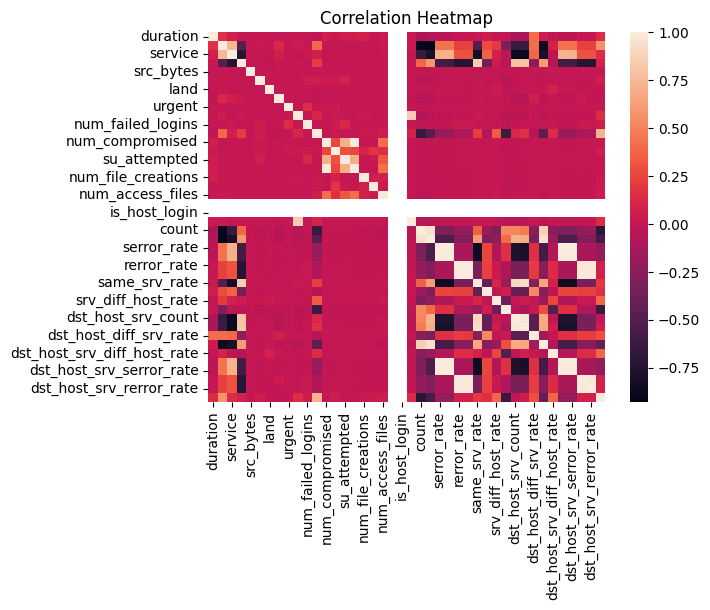

In [24]:
corr = data.corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
data.corr()['Attack Type']

duration                       0.137760
protocol_type                  0.575897
service                        0.140888
flag                           0.094496
src_bytes                      0.009479
dst_bytes                      0.065148
land                          -0.002593
wrong_fragment                -0.023350
urgent                         0.011768
hot                            0.148142
num_failed_logins              0.050133
logged_in                      0.720709
num_compromised                0.005351
root_shell                     0.056488
su_attempted                   0.009225
num_root                       0.010508
num_file_creations             0.028376
num_shells                     0.028934
num_access_files               0.050544
num_outbound_cmds                   NaN
is_host_login                       NaN
is_guest_login                 0.140055
count                         -0.716266
srv_count                     -0.561215
serror_rate                   -0.217870


In [26]:
col_drop=['count','srv_count','serror_rate','dst_host_same_src_port_rate','dst_host_count','num_outbound_cmds','dst_host_serror_rate','dst_host_srv_serror_rate','wrong_fragment','srv_serror_rate']
data=data.drop(col_drop,axis=1)

In [27]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,1.0,0.0,0.0,0.0,0.0,1
1,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,1.0,0.0,0.0,0.0,0.0,1
2,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,1.0,0.0,0.0,0.0,0.0,1
3,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,1.0,0.0,0.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,59,1.0,0.0,0.0,0.0,0.0,1


Data Split

In [28]:
x=data.drop(['Attack Type'],axis=1)
y=data['Attack Type'].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Handling Imbalance data

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Model Training (Decision Tree)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state =42,max_depth=5, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_pred=model.predict(x_test)

metrics 

In [34]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9597991984130197


In [35]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred))

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78354
           1       1.00      0.81      0.90     19368
           2       0.27      0.98      0.43       837
           3       0.72      0.96      0.82       234
           4       0.01      0.91      0.01        11

    accuracy                           0.96     98804
   macro avg       0.60      0.93      0.63     98804
weighted avg       0.99      0.96      0.97     98804



In [36]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

confusion_matrix: [[78002    48   220     5    79]
 [   16 15776  1963    82  1531]
 [   10     1   819     0     7]
 [    0     0     2   225     7]
 [    0     0     0     1    10]]


ROC-AUC curve

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [38]:
classifier = OneVsRestClassifier(model)

In [39]:
y_score = classifier.fit(X_train_resampled, y_train_resampled).predict_proba(x_test)

In [40]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))

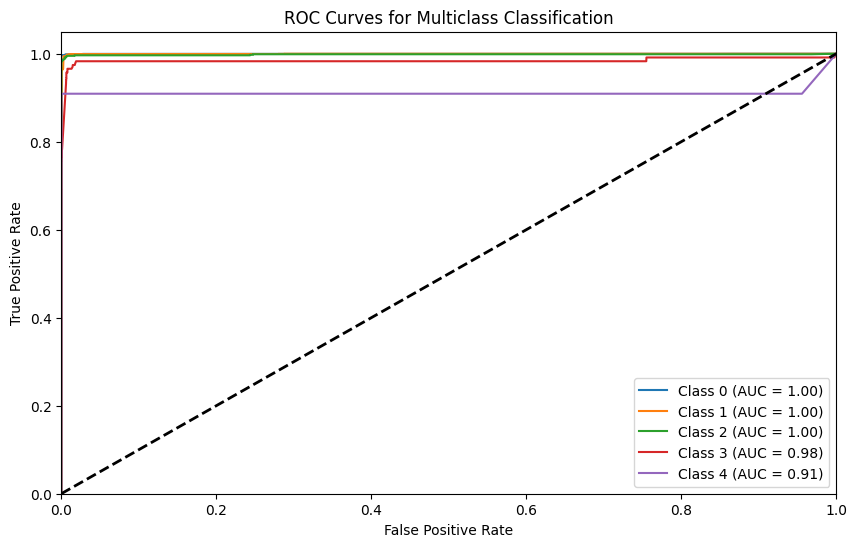

In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

KFold Cross validation

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
cross_val_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

In [45]:
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.95168698 0.95173489 0.95190097 0.95153687 0.95215647]
Mean Accuracy: 0.9518032347079565


Model Training (GaussianNB)

In [46]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [47]:
y_pred1=model1.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred1))

accuracy: 0.7918808955103033


In [49]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred1))

Classification_report:               precision    recall  f1-score   support

           0       0.85      0.99      0.92     78354
           1       0.39      0.01      0.03     19368
           2       0.02      0.03      0.03       837
           3       0.16      0.03      0.05       234
           4       0.00      0.91      0.00        11

    accuracy                           0.79     98804
   macro avg       0.29      0.40      0.20     98804
weighted avg       0.75      0.79      0.73     98804



In [50]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred1))

confusion_matrix: [[77923   431     0     0     0]
 [13078   278   884    36  5092]
 [  812     0    23     0     2]
 [  150     0    15     7    62]
 [    0     1     0     0    10]]


Model Training (Random Forest Classifier)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(bootstrap=True,n_estimators=100,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,max_depth=5)
model2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [52]:
y_pred2=model2.predict(x_test)

Metrics

In [53]:
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(y_test,y_pred2))

accuracy: 0.9816505404639488


In [54]:
from sklearn.metrics import classification_report
print("Classification_report:",classification_report(y_test,y_pred2))

Classification_report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00     78354
           1       0.97      0.94      0.96     19368
           2       0.95      0.99      0.97       837
           3       0.21      0.95      0.35       234
           4       0.03      1.00      0.06        11

    accuracy                           0.98     98804
   macro avg       0.63      0.97      0.67     98804
weighted avg       0.99      0.98      0.99     98804



In [55]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred2))

confusion_matrix: [[77755   505    21     2    71]
 [   66 18176    18   819   289]
 [    4     4   827     0     2]
 [    1     1     1   222     9]
 [    0     0     0     0    11]]


ROC-AUC curve

In [56]:
classifier1 = OneVsRestClassifier(model2)
y_score1 = classifier1.fit(X_train_resampled, y_train_resampled).predict_proba(x_test)

In [57]:
y_test_bin1 = label_binarize(y_test, classes=np.unique(y))

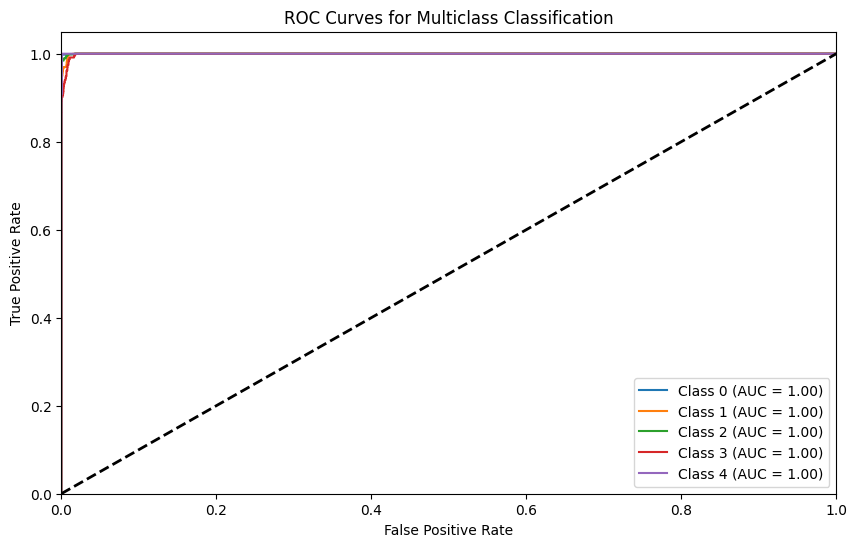

In [58]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

KFold cross validation

In [76]:
cross_val_scores = cross_val_score(model2, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

In [77]:
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.9772376  0.97710984 0.97678727 0.97624751 0.97536601]
Mean Accuracy: 0.9765496448464408


Predicting the unknown data

In [64]:
test = pd.read_csv('kddcup.testdata.unlabeled.gz')
test.head()

,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,1.2,1.3,1.00.1,0.00.6,1.00.2,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11
0,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


Data Preprocessing

In [65]:
col_names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
                'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
test.columns=col_names


In [66]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [67]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [68]:
test['service']=encoder.fit_transform(test['service'])
test['protocol_type']=encoder.fit_transform(test['protocol_type'])
test['flag']=encoder.fit_transform(test['flag'])

Feature Engineering according to trained model

In [69]:
col_drop=['count','srv_count','serror_rate','dst_host_same_src_port_rate','dst_host_count','num_outbound_cmds','dst_host_serror_rate','dst_host_srv_serror_rate','wrong_fragment','srv_serror_rate']
test=test.drop(col_drop,axis=1)

In [70]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
1,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
2,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
3,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0
4,0,2,50,9,105,146,0,0,0,0,...,0.0,1.0,0.0,0.0,254,1.0,0.01,0.0,0.0,0.0


In [71]:
subset_size = 300000
reduced_data = test.head(subset_size) 
print(reduced_data)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              2       50     9        105        146     0   
1              0              2       50     9        105        146     0   
2              0              2       50     9        105        146     0   
3              0              2       50     9        105        146     0   
4              0              2       50     9        105        146     0   
...          ...            ...      ...   ...        ...        ...   ...   
299995         0              0       15     9       1032          0     0   
299996         0              0       15     9       1032          0     0   
299997         0              0       15     9       1032          0     0   
299998         0              0       15     9       1032          0     0   
299999         0              0       15     9       1032          0     0   

        urgent  hot  num_failed_logins  ...  srv_rerror_rate  s

In [72]:
y_pred3=model2.predict(reduced_data)

In [74]:
encoding_mapping = {
    0: 'dos',
    1: 'normal',
    2: 'probe',
    3: 'r21',
    4: 'u2r'
  
}
y_Predictions = [encoding_mapping[pred] for pred in y_pred3]


In [75]:
import smtplib

anomaly_count = 0
anomaly_details = []

for i in range(len(y_Predictions)):
    if y_Predictions[i] != 'normal':
        anomaly_count += 1
        anomaly_features = test.iloc[i]

        predicted_attack_type = y_Predictions[i] 

        print("Anomaly Detected!")
        print("Anomaly Features:", anomaly_features)
        print("Attack Type:", predicted_attack_type) 
        anomaly_details.append(str(anomaly_features) + "\nAttack Type: " + predicted_attack_type)

    if anomaly_count == 5:
        sender_email = '' //sender email
        sender_password = '' // email password
        receiver_email = '' // receiver email
        smtp_server = 'smtp.gmail.com'
        smtp_port = 587

        def send_email():
            subject = 'Anomalies Detected'
            body = 'Anomalies have been detected. Here are the details:\n\n' + '\n\n'.join(anomaly_details)

            message = f'Subject: {subject}\n\n{body}'

            try:
                with smtplib.SMTP(smtp_server, smtp_port) as server:
                    server.starttls()
                    server.login(sender_email, sender_password)
                    server.sendmail(sender_email, receiver_email, message)
                    print('Email sent successfully.')
            except smtplib.SMTPException as e:
                print(f'Error sending email: {e}')

        send_email()
        break


Anomaly Detected!
Anomaly Features: duration                        0.00
protocol_type                   2.00
service                        44.00
flag                            9.00
src_bytes                      48.00
dst_bytes                      48.00
land                            0.00
urgent                          0.00
hot                             0.00
num_failed_logins               0.00
logged_in                       0.00
num_compromised                 0.00
root_shell                      0.00
su_attempted                    0.00
num_root                        0.00
num_file_creations              0.00
num_shells                      0.00
num_access_files                0.00
is_host_login                   0.00
is_guest_login                  0.00
rerror_rate                     0.00
srv_rerror_rate                 0.00
same_srv_rate                   1.00
diff_srv_rate                   0.00
srv_diff_host_rate              0.00
dst_host_srv_count              3.00
ds